# Machine Learning Overview
Machine learning is a science of getting computers to learn without being explicitly programmed. According to the Arthur Samuel (1959), it is the field that gives computers the ability to learn without being explicitly programmed (He wrote a checkers program and the computers had learned through its mistake to become a better player over time). 

The more opportunities you give a learning algorithm to learn, the better it becomes. 

Types of machine learning algorithms: 
- Supervised learning: has been used most widely in real-world applications
- Unsupervised learning
- Recommender systems
- Reinforcement learning

## Supervised Learning
99% of machine learning created today is called supervised learning

They are algorithm that learn to predict input vs output, or X to Y, mappings. You give it the correct answers (labels), and by seeing the inputs and outputs, it is able to look at unlabelled examples and predict the outputs (e.g., spam filtering, speech recognition, machine translation, online ads - will user click or not, self-driving cars - image detection, visual inspection - defects detection in manufacturing)

For example, want to predict the housing prices given the size of the house. Let's generate the data

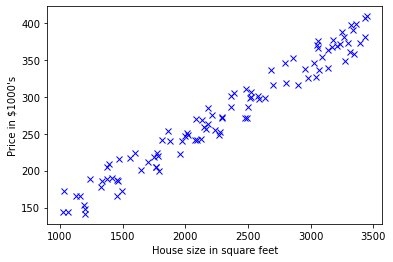

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate dataset for housing prices
def generate_housing_data(num_houses=100):
    np.random.seed(42)
    house_size = np.random.randint(low=1000, high=3500, size=num_houses)
    house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_houses)
    return np.column_stack((house_size, house_price))

data = generate_housing_data()
data[:,1] = data[:,1]/1000.0    # scale the price to $1000's

# plot the data
plt.plot(data[:,0], data[:,1], 'bx')
plt.ylabel("Price in $1000's")
plt.xlabel('House size in square feet')
plt.show()

From the figure above, we can fit a straight line to predict the price of the house given the size of the house. However, we can also fit more complex algorithms, such as quadratic function, cubic function, etc. In machine learning, we are finding the best function that will fit our data. This type of supervised learning is called *regression*, meaning we are trying to predict a continuous value (e.g., price of the house).

Another type of supervised learning is called classification. Let's take a look below

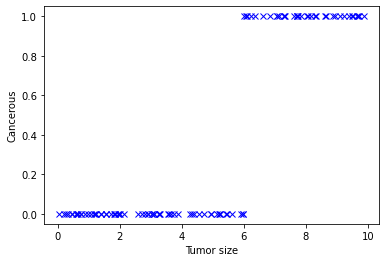

In [2]:
# generate breast cancer dataset given the size of the tumor
def generate_cancer_data(num_samples = 100):
    np.random.seed(42)
    tumor_size = np.random.rand(num_samples) * 10.0
    tumor_label = np.zeros(num_samples)
    for i in range(num_samples):
        if tumor_size[i] > 6.0:
            tumor_label[i] = 1
        else:
            tumor_label[i] = 0
    return np.column_stack((tumor_size, tumor_label))

breast = generate_cancer_data()
plt.plot(breast[:,0], breast[:,1], 'bx')
plt.ylabel("Cancerous")
plt.xlabel('Tumor size')
plt.show()

Our learning algorithm will try to predict whether the cell is malignant or benign. In this case, we are trying to predict a discrete value (e.g., malignant or benign), which makes it a classification problem. We can also have multiple classes to be predicted, such as *benign*, *malignant*, and *unknown*. Here we had only one input input value (size of the tumor), but we can have multiple input values (e.g., size of the tumor, age of the patient, etc.).

## Unsupervised Learning
After supervised learning, the most widely used machine learning algorithm is unsupervised learning. In unsupervised learning, we are not given any labels, and we are trying to find some structure in the data. For example, we are given the patient's age, size of the tumor but we are not given whether it is malignant or benign. The algorithms finds the data *structure/pattern* and groups the data into two different clusters (malignant and benign). This is called *clustering*.

Another type of unsupervised learnign is called *anomaly detection* to find unusual data points and *dimensionality reduction* to reduce the number of features in the data.

## Linear Regression
Linear regression is a supervised learning algorithm that tries to fit a straight line to the data to predict the output (a continuous number). 

Terminology:

- Train set: the data that we use to train the algorithm. We are given the input and output values.
- Features (x): the input values (e.g., size of the house)
- Labels (y): the output values, also called target variable (e.g., price of the house)

The single training example is defined as (x, y), where x is the input and y is the output. 

How does a supervised learning algorithm work: 
- Given a training set of features and labels, the algorithm **learns a function that maps the input to the output**. This is called a *hypothesis function*. The job of this function is to take the new input, $x$, and predict the output, $\hat{y}$ (the estimate of $y$). 

In algorithms, how are are going to represent the function, f? In linear regression, we are going to use a linear function, $f_{w,b}(x) = wx + b$. The values chosen for $w$ and $b$ are called the *parameters*, and according to these values, the function will be able to predict the output.

Let's come back to the housing prices example above. 

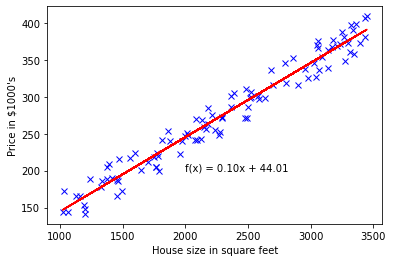

In [8]:
# plot the data
plt.plot(data[:,0], data[:,1], 'bx')
plt.ylabel("Price in $1000's")
plt.xlabel('House size in square feet')
# fit straight line to the data
x = data[:,0]
y = data[:,1]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, m*x + c, 'r')
# label straight line
plt.text(2000, 200, 'f(x) = {0:.2f}x + {1:.2f}'.format(m, c))
plt.show()

Notice that we have fit a hypothesis linear function to the data. This is called a univariate linear regression because we used only one feature (size of the house). 

For any machine learning algorithm to work, a cost function has to be determined. This function tells us how good our hypothesis function is to predict the output. The goal of the algorithm is to minimize the cost function. Depending on the values chosen for the parameters/coefficients $w$ and $b$, the cost function will be different.

How do we find the best values for $w$ and $b$ so that the predicted value, $\hat{y}$, is as close as possible to the actual value, $y$? We can use the cost function to find the best values for $w$ and $b$. The cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$$

where $m$ is the number of training examples. The cost function is the sum of the squared errors. *The squared error* is the difference between the predicted value, $\hat{y}$, and the actual value, $y$. The squared error is squared so that the error is always positive. The cost function is divided by $2m$ so that the derivative of the cost function is easier to compute (i.e., we do not want the cost function to be bigger as the number of training examples increases). This is called the **squared error cost function** and it is the most common cost function used in linear regression.

To be more explicit the cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} f_({w,b})^({i}) + b - y^{(i)})^2$$

where $x^{(i)}$ is the $i^{th}$ training example and $y^{(i)}$ is the $i^{th}$ training example label.